# Implementing simple ML pipeline

Load libraries from Scikit-Learn

In [168]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.pipeline import Pipeline

Working on iris, wine, breast cancer, digits datasets from Scikit-Learn dataset

In [169]:
# Load and split the data
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size= 0.2, random_state=42)

print("X train: ", X_train.shape)
print("X test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

X train:  (455, 30)
X test:  (114, 30)
y train:  (455,)
y test:  (114,)


Creating a ML pipeline 

In [170]:
# defining the dictionary for methods and functions
dict = {'Logistic Regression': LogisticRegression(),
        'Gaussian Bayes': GaussianNB(),
        'Support Vector Machine': svm.SVC(kernel='linear'),
        'Stochastic Gradient Descent': SGDClassifier(),
        'Decision Tree': tree.DecisionTreeClassifier(),
        'Neural Networks': MLPClassifier(),
        'Gradient Tree Boosting': GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=1, random_state=0),
        'Random Forests': RandomForestClassifier(n_estimators = 500)}

score = []
algos = []
for key, value in list(dict.items()):
    algos.append(key)
    # defining pipeline
    pipeline = Pipeline([('minmax', MinMaxScaler()), ('ML_algos', value)])

    # fit to training dataset
    pipeline.fit(X_train, y_train)
    
    # evaluation
    score.append(pipeline.score(X_test, y_test)) 

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Plotting accuracy vs methods used

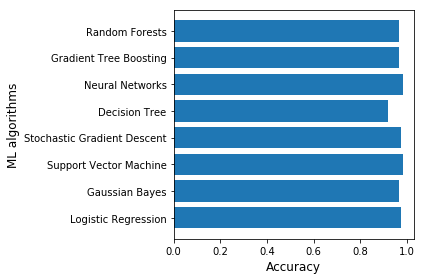

In [171]:
import matplotlib.pyplot as plt

plt.barh(algos, score)
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('ML algorithms', fontsize=12)
plt.tight_layout()

plt.show()